In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Sequential, load_model

In [2]:
img = image.load_img("PicDataset/train/asian/78.jpg")

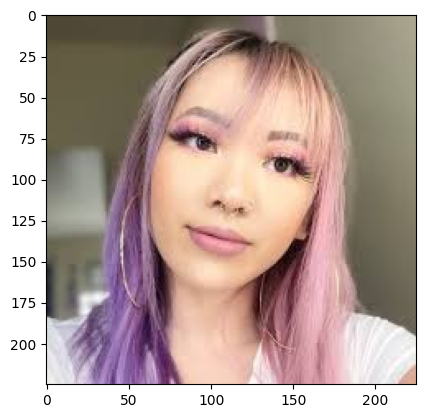

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("PicDataset/train/asian/78.jpg").shape

(225, 225, 3)

In [5]:
datagen = ImageDataGenerator(rescale=1. / 255, rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
datagen_test = ImageDataGenerator(rescale=1. / 255)

In [6]:
train_dataset = datagen.flow_from_directory("PicDataset/train/",
                                         target_size=(299,299),
                                         batch_size=5,
                                         class_mode='binary')

test_dataset = datagen_test.flow_from_directory("PicDataset/test/",
                                         target_size=(299,299),
                                         batch_size=5,
                                         class_mode='binary')

Found 130 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'arab': 0, 'asian': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(299, 299, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [11]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy',])

In [12]:
model.fit(train_dataset, verbose=2, epochs=10, validation_data=test_dataset)

Epoch 1/10
26/26 - 13s - loss: 1.9229 - accuracy: 0.5385 - val_loss: 0.6935 - val_accuracy: 0.5000 - 13s/epoch - 484ms/step
Epoch 2/10
26/26 - 10s - loss: 0.7152 - accuracy: 0.4615 - val_loss: 0.6931 - val_accuracy: 0.5462 - 10s/epoch - 400ms/step
Epoch 3/10
26/26 - 10s - loss: 0.6930 - accuracy: 0.5231 - val_loss: 0.7022 - val_accuracy: 0.5000 - 10s/epoch - 397ms/step
Epoch 4/10
26/26 - 10s - loss: 0.7206 - accuracy: 0.4692 - val_loss: 0.6939 - val_accuracy: 0.5000 - 10s/epoch - 398ms/step
Epoch 5/10
26/26 - 11s - loss: 0.7380 - accuracy: 0.5462 - val_loss: 0.6929 - val_accuracy: 0.5154 - 11s/epoch - 409ms/step
Epoch 6/10
26/26 - 11s - loss: 0.8420 - accuracy: 0.5231 - val_loss: 0.6927 - val_accuracy: 0.5538 - 11s/epoch - 421ms/step
Epoch 7/10
26/26 - 10s - loss: 0.8670 - accuracy: 0.5923 - val_loss: 0.6948 - val_accuracy: 0.5231 - 10s/epoch - 377ms/step
Epoch 8/10
26/26 - 10s - loss: 0.7512 - accuracy: 0.6154 - val_loss: 0.7195 - val_accuracy: 0.4846 - 10s/epoch - 379ms/step
Epoch 9/

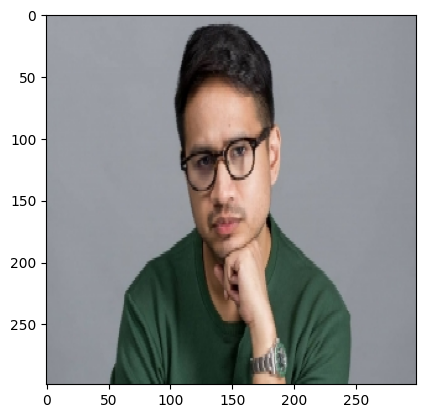

1/1 [==============================] - 0s 124ms/step
Asian


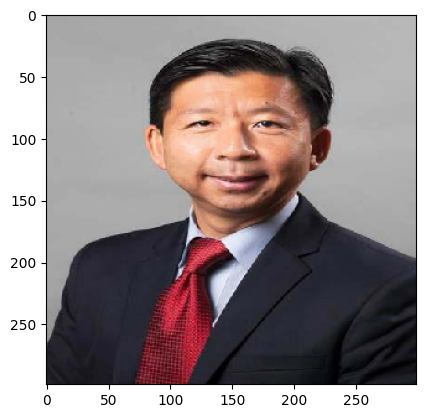

1/1 [==============================] - 0s 42ms/step
Asian


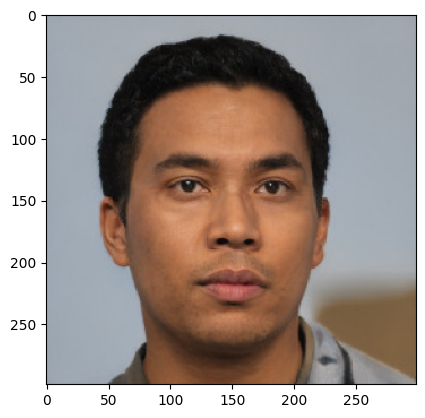

1/1 [==============================] - 0s 43ms/step
Arab


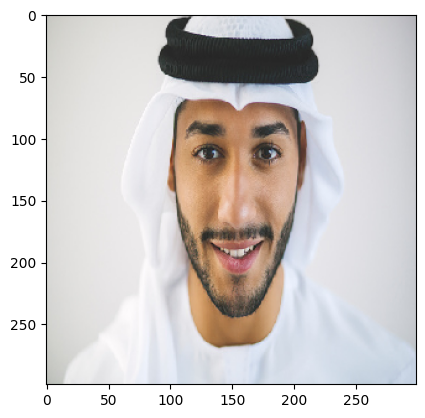

1/1 [==============================] - 0s 42ms/step
Arab


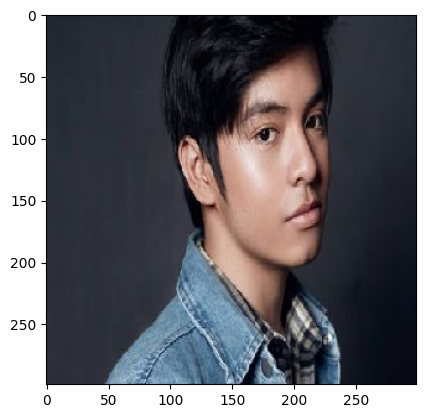

1/1 [==============================] - 0s 41ms/step
Asian


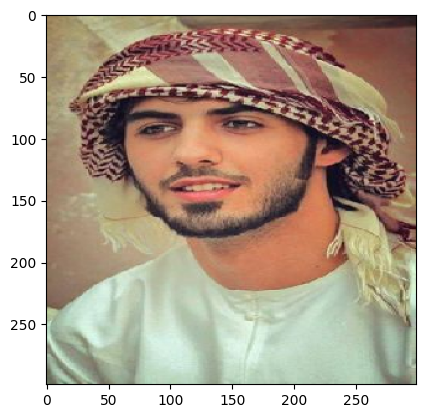

1/1 [==============================] - 0s 44ms/step
Arab


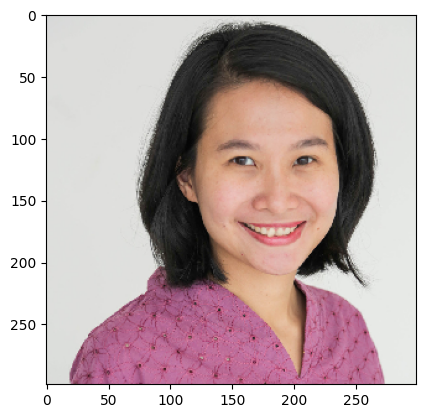

1/1 [==============================] - 0s 50ms/step
Asian


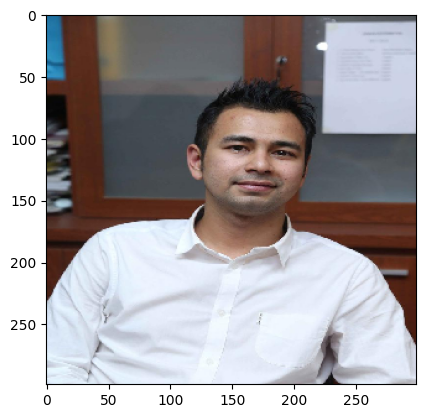

1/1 [==============================] - 0s 45ms/step
Asian


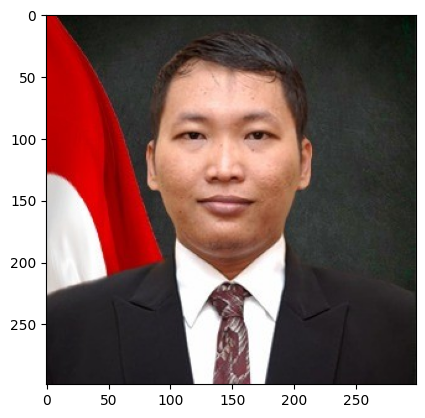

1/1 [==============================] - 0s 45ms/step
Asian


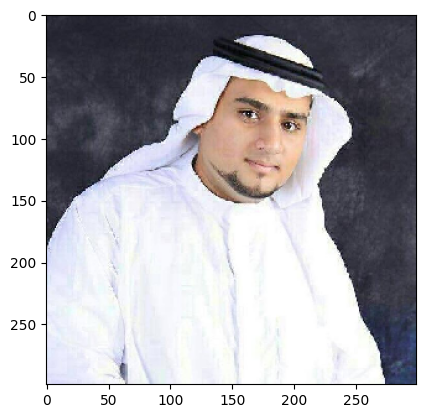

1/1 [==============================] - 0s 44ms/step
Arab


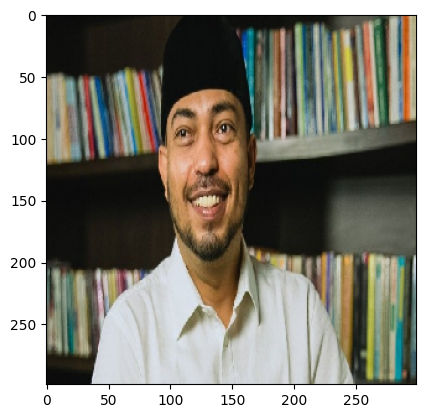

1/1 [==============================] - 0s 47ms/step
Arab


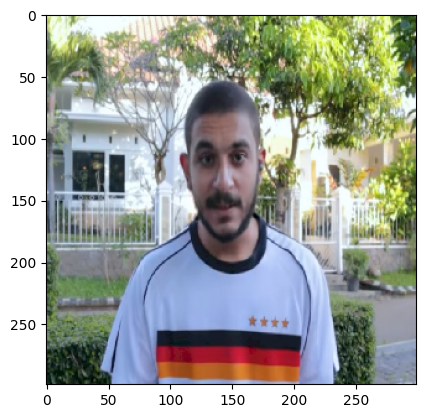

1/1 [==============================] - 0s 43ms/step
Asian


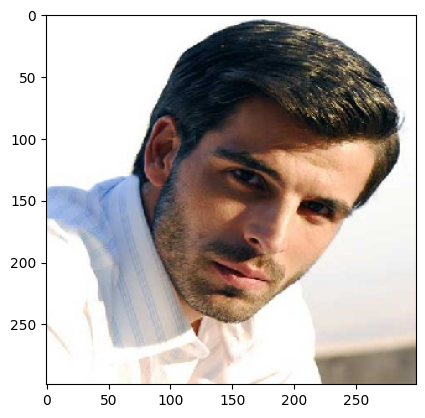

1/1 [==============================] - 0s 52ms/step
Arab


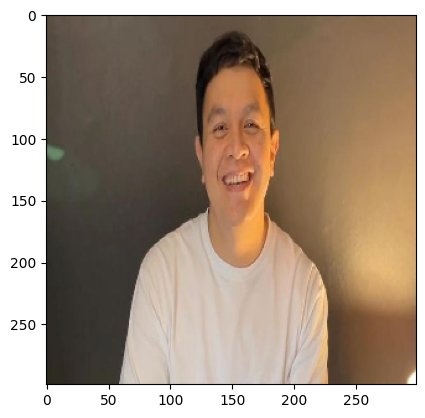

1/1 [==============================] - 0s 50ms/step
Asian


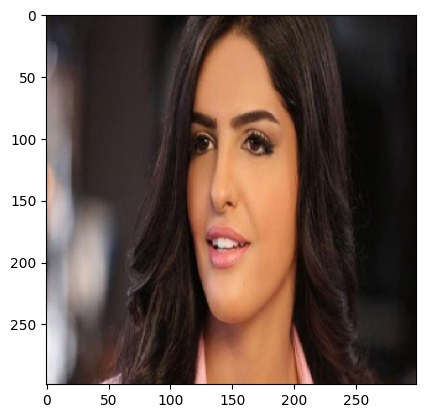

1/1 [==============================] - 0s 43ms/step
Asian


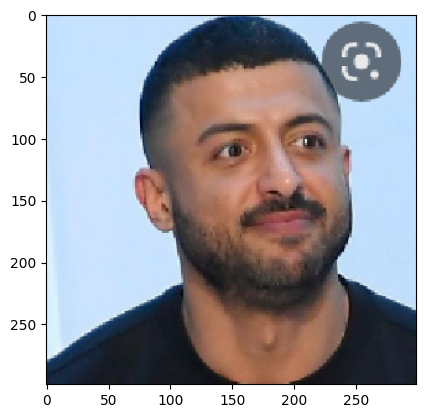

1/1 [==============================] - 0s 60ms/step
Asian


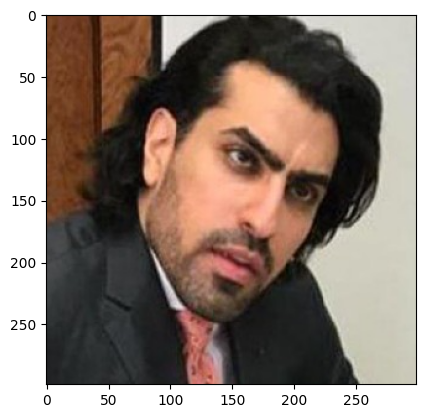

1/1 [==============================] - 0s 46ms/step
Arab


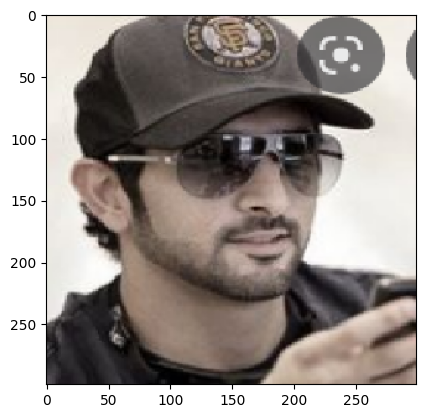

1/1 [==============================] - 0s 46ms/step
Arab


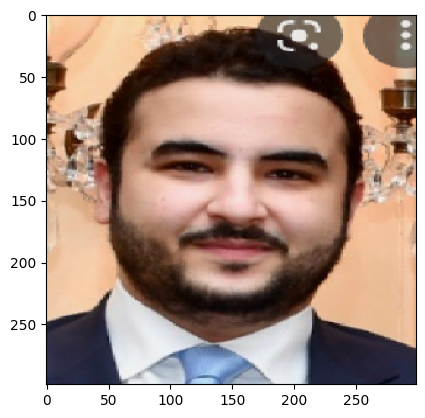

1/1 [==============================] - 0s 49ms/step
Arab


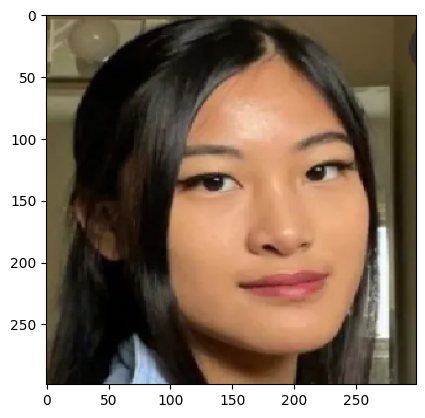

1/1 [==============================] - 0s 44ms/step
Asian


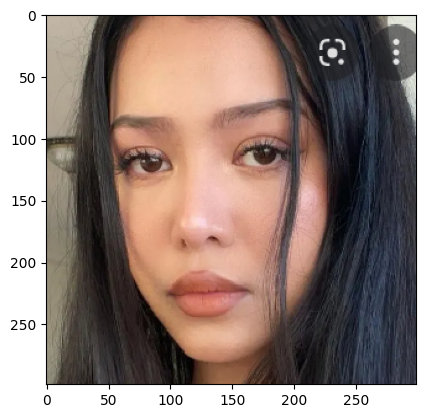

1/1 [==============================] - 0s 59ms/step
Arab


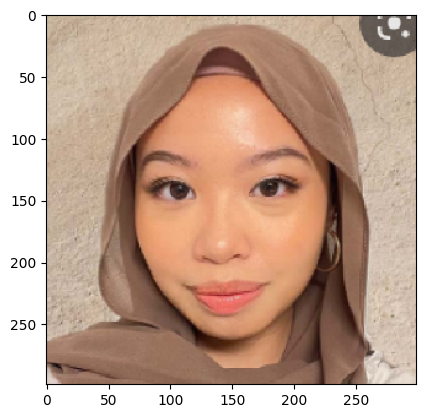

1/1 [==============================] - 0s 43ms/step
Asian


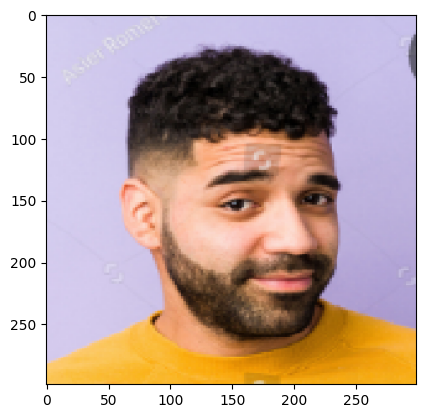

1/1 [==============================] - 0s 44ms/step
Asian


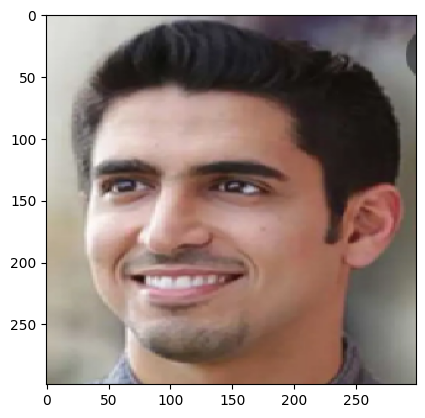

1/1 [==============================] - 0s 47ms/step
Asian


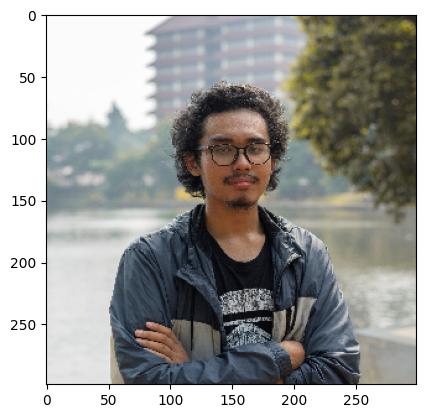

1/1 [==============================] - 0s 52ms/step
Asian


In [13]:
dir_path = 'PicDataset/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(299,299,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    
    pred = model.predict(images)
    if(pred == 0):
        print("Arab")
    else:
        print("Asian")
        